<a href="https://colab.research.google.com/github/IsabelaAthayde/fuels-price-analysis/blob/main/trabalho_em_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red" size="7rem"> Perguntas a serem respondidas </font>

*<font color="red" size="5rem"> Isabela:</font>
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
------
* <font color="red" size="5rem">Ilma:</font>
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
-----
* <font color="red" size="5rem">Gabriel:</font>
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
-----
* <font color="red" size="5rem">Albino:</font>
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
11. Qual a média entre a Gasolina comum e a gasolina aditivada nesse período?
-----
* <font color="red" size="5rem">Debora:</font>
12. Qual é a variação percentual dos preços da gasolina e do etanol em cada estado durante os dois meses citados?
13. Qual é a relação entre o preço médio da gasolina e do etanol e o IDH (Índice de Desenvolvimento Humano) de cada estado?

<Font size='15rem' color="lightgreen" /> <center>Projeto em Grupo</center>

In [1]:
# Adicione  todas as importações aqui

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

# Para criação de mapa
import geopandas as gpd

# Verifique se você já possui os arquivos antes de continuar

 1. <font color="green" size="4rem"/> Arquivos do df de preços

In [2]:
import os
from google.colab import files

# Verificar se os arquivos já existem
arquivo_11 = '/content/precos-gasolina-etanol-11.csv'
arquivo_12 = '/content/precos-gasolina-etanol-12.csv'

if not (os.path.exists(arquivo_11) and os.path.exists(arquivo_12)):
    print("Seu colab não possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.\n")

    # Se o usuário não tiver os arquivos, fornecer links para download
    print("Clique nos links abaixo para baixar os arquivos:")

    link_11 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-11.csv'
    link_12 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-12.csv'

    print(f"1. Baixar 'precos-gasolina-etanol-11': {link_11}")
    print(f"2. Baixar 'precos-gasolina-etanol-12': {link_12}")
    print('\n-------------------------------------------\n')
    print('Ou Caso já possua os arquivos na sua máquina, selecione os arquivos:')

    uploaded = files.upload()
    # Após o upload, os arquivos podem ser manipulados no ambiente do Colab
else:
    print("Você já possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.")


Você já possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.


2. <font color="green" size="4rem"/>  Arquivo para o mapa do Brasil



In [ ]:
import os
from google.colab import files

# Verificar se os arquivos já existem
arquivos = ['/content/estados_2010.dbf', '/content/estados_2010.prj', '/content/estados_2010.qpj', '/content/estados_2010.shp', '/content/estados_2010.shx']

# Verificar se todos os arquivos existem
todos_existem = all(os.path.exists(arquivo) for arquivo in arquivos)

if (todos_existem):
    print("Você possuí todos os arquivos necessários no colab para rodar os mapas")
else:
  for arq in arquivos:
    if not (os.path.exists(arq)):
        print("Você não possuí o arquivo", arq)

  print(f"\n1. Por favor acesse o link do drive e baixe os arquivos que faltam ")
  print('https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1')
  print(f"2. Extraia os arquivos do zip/winrar, pegue os arquivos da pasta estados_2010 e o coloque todos eles dentro do colab")
  print('-------------------------------------------')



Você não possuí o arquivo /content/estados_2010.dbf
Você não possuí o arquivo /content/estados_2010.prj
Você não possuí o arquivo /content/estados_2010.qpj
Você não possuí o arquivo /content/estados_2010.shp
Você não possuí o arquivo /content/estados_2010.shx

1. Por favor acesse o link do drive e baixe os arquivos que faltam 
https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1
2. Extraia os arquivos do zip/winrar, pegue os arquivos da pasta estados_2010 e o coloque todos eles dentro do colab
-------------------------------------------


# Recebendo os arquivos reais e concatenando

In [ ]:
# Arquivos dos dois últimos meses de 2023
nov = pd.read_csv('precos-gasolina-etanol-11.csv', sep=';')
dez = pd.read_csv('precos-gasolina-etanol-12.csv', sep=';')

# Junta os dois DataFrames
df = pd.concat([nov, dez])

# Visualize as primeiras linhas do DataFrame
display(df)

# Tratamentos

- <font color = "darkblue"> Removendo nulos da coluna valor de compra

In [4]:
df.drop(columns=['Valor de Compra'], inplace=True)

- <font color = "darkblue"> Transformando a data de object para datetime

In [5]:
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')

- <font color = "darkblue"> mudar valor de venda object type para float

In [7]:
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

In [9]:
# Converter a coluna 'Valor de Venda' para tipo numérico (float)
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')

- <font color = "darkblue"> Verificando valores nulos em todo o DataFrame
<!-- -!Visualizar boxplots é uma maneira eficaz de identificar outliers -->

- <font color = "darkblue">Verificar valores nulos em todo o DataFrame

In [10]:

valores_nulos_totais = df.isnull()

# Exibir o DataFrame de booleanos (True para valores nulos, False para valores não nulos)
print(valores_nulos_totais)

       Regiao - Sigla  Estado - Sigla  Municipio  Revenda  CNPJ da Revenda  \
0               False           False      False    False            False   
1               False           False      False    False            False   
2               False           False      False    False            False   
3               False           False      False    False            False   
4               False           False      False    False            False   
...               ...             ...        ...      ...              ...   
24513           False           False      False    False            False   
24514           False           False      False    False            False   
24515           False           False      False    False            False   
24516           False           False      False    False            False   
24517           False           False      False    False            False   

       Nome da Rua  Numero Rua  Complemento  Bairro    Cep  Pro

- <font color = "darkblue">Verificando se há duplicatas

In [11]:
#Se todas as entradas são False, isso significa que não há duplicatas no DataFrame.
duplicatas = df.duplicated()
print(duplicatas)

0        False
1        False
2        False
3        False
4        False
         ...  
24513    False
24514    False
24515    False
24516    False
24517    False
Length: 77061, dtype: bool


-----------------------------------------------------------

# <font color = "lightgreen"> 1- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou aumento?

Todos os três tipos de combutíveis apresentaram uma tendência de queda durante os dois meses analisados.

* O preço da gasolina durante esse tempo foi em média 5,67 reais no início de novembro para 5,61 reais no final de dezembro, sua queda foi de -1,15%.

* O preço da gasolina aditivada durante esse período foi em média 5,85 reais no início de novembro para 5,80 reais no final de dezembro, sua queda foi de -0,82%.

* O preço da etanol durante esse tempo foi em média 3,88 reais no início de novembro para 3,72 reais no final de dezembro, sua queda foi de -4,05%.

In [ ]:
# Defini a primeira semana de novembro como semana 1
df['Semana'] = (df['Data da Coleta'].dt.isocalendar().week - 44) % 52 + 1

# Cálculo da média semanal para cada produto
media_semanal = df.groupby(['Produto', 'Semana'])['Valor de Venda'].mean().reset_index()

# Junta os dados dos três produtos em um único dataframe
dados_semanais = pd.concat([media_semanal[media_semanal['Produto'] == produto] for produto in ['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL']])
dados_semanais.sort_index(ascending=True, inplace=True)

In [ ]:
# Dividi os dados como antes e depois da quinta semana
df_preco_alto = dados_semanais[dados_semanais['Semana'] <= 5]
df_preco_baixo = dados_semanais[dados_semanais['Semana'] >= 5]


# Paletas personalizadas
nov_palette = ['#00FF87','#0078FF','#045959']
dez_palette = ['#FF0078','#FF8700','#C00500']

# Remove duplicatas geradas na mudança de cor
produtos = df_preco_alto['Produto'].unique()

plt.figure(figsize=(10, 6))

for i, produto in enumerate(produtos):
    sns.lineplot(x='Semana', y='Valor de Venda', data=df_preco_alto[df_preco_alto['Produto'] == produto], color=nov_palette[i], label=produto, linewidth=2.5, marker='o')
    sns.lineplot(x='Semana', y='Valor de Venda', data=df_preco_baixo[df_preco_baixo['Produto'] == produto], color=dez_palette[i], label=None, linewidth=2.5, marker='o')

# Altera os rótulos do eixo x pra meses
plt.xticks(ticks=[3, 7], labels=['Novembro', 'Dezembro'])
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda (R$ / litro)')

# Defini o range min e max
plt.ylim(3.5, 6.2)
plt.show()

# <font color = "lightgreen"> 2- Qual o preço médio da gasolina e do etanol nesses dois meses?

O preço médio do etanol teve uma queda de aproximadamente 1.82%, indicando uma diminuição mais acentuada nos valores médios durante os dois meses.

A gasolina, por outro lado, apresentou uma queda mais leve na faixa de 0.70% nos preços médios.

Ou seja, o etanol teve uma variação percentual mais significativa em comparação com a gasolina nos dois meses, o que pode indicar influências específicas para o etanol durante esse período.

In [ ]:
gas_nov = df[(df['Produto'] == 'GASOLINA') & (df['Data da Coleta'] >= '2023/11/01') & (df['Data da Coleta'] <= '2023/11/30') ]
gas_dez = df[(df['Produto'] == 'GASOLINA') & (df['Data da Coleta'] >= '2023/12/01') & (df['Data da Coleta'] <= '2023/12/30') ]

eta_nov = df[(df['Produto'] == 'ETANOL') & (df['Data da Coleta'] >= '2023/11/01') & (df['Data da Coleta'] <= '2023/11/30') ]
eta_dez = df[(df['Produto'] == 'ETANOL') & (df['Data da Coleta'] >= '2023/12/01') & (df['Data da Coleta'] <= '2023/12/30') ]

# Calculando a média
media_gas_nov = gas_nov['Valor de Venda'].mean()
media_gas_dez = gas_dez['Valor de Venda'].mean()

media_eta_nov = eta_nov['Valor de Venda'].mean()
media_eta_dez = eta_dez['Valor de Venda'].mean()

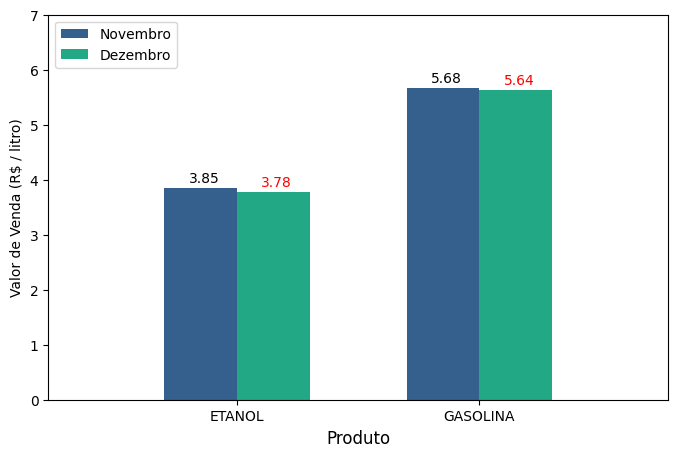

In [ ]:
# Defini os valores a serem usados no eixo x
produtos = ['ETANOL', 'GASOLINA']

# Defini a largura das barras
bar_largura = 0.30

# Defini a posição das barras de acordo com a largura predefinida
bar_m11 = np.arange(len(produtos))
bar_m12 = [x + bar_largura for x in bar_m11]

plt.figure(figsize=(8, 5))

# Cria o grafico de barras
plt.bar(bar_m11, [media_eta_nov, media_gas_nov], color=cm.viridis(0.3), width=0.30, label='Novembro')
plt.bar(bar_m12, [media_eta_dez, media_gas_dez], color=cm.viridis(0.6), width=0.30, label='Dezembro')

# Adiciona os valores nas barras
for i in range(len(bar_m11)):
    plt.text(x = bar_m11[i]-0.05 , y = [media_eta_nov, media_gas_nov][i]+0.1, s = format([media_eta_nov, media_gas_nov][i], '.2f'), size = 10)
    plt.text(x = bar_m12[i]-0.05 , y = [media_eta_dez, media_gas_dez][i]+0.1, s = format([media_eta_dez, media_gas_dez][i], '.2f'), size = 10, color='red')

# Adiciona os rótulos ao eixo x
plt.xlabel('Produto', fontsize=12)
plt.xticks([r + bar_largura/2 for r in range(len(produtos))], produtos)

# Adiciona o rótulo ao eixo y
plt.ylabel('Valor de Venda (R$ / litro)')
plt.ylim(0, 7)

# Adiciona margem no gráfico
plt.margins(x=0.3, y=0.3)

# Cria a legenda
plt.legend(loc='upper left')

# Mostra o gráfico
plt.show()


# <font color = "lightgreen"> 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?


O Mapa de calor feito com geopandas com base no mapa do Brasil.

<font color="red" size="3rem">Para prosseguir serão necessários alguns arquivos da pasta estados_2010 que foram pedidos no tópico de **Verificação**</font>

In [ ]:
# Carrega o shapefile/ modelo do brasil e seus estados
brasil = gpd.read_file('estados_2010.shp')

df_media = df.copy()

# Renomeia as coluna de Estado para que não haja conflito entre dataframe
df_media = df_media.rename(columns={'Estado - Sigla': 'eSigla'})
brasil = brasil.rename(columns={'sigla': 'eSigla'})

# Agrupa por Sigla de Estado e Produto
df_media = df_media.groupby(['eSigla', 'Produto'])['Valor de Venda'].mean()

# Transforma a Series em dataframe
df_media = df_media.to_frame()

# Reseta o index
df_media.reset_index(inplace=True)

# Defini os indexes como eSigla
df_media = df_media.set_index('eSigla')
brasil = brasil.set_index('eSigla')

ERROR:fiona._env:estados_2010.shp: No such file or directory


DriverError: estados_2010.shp: No such file or directory

In [ ]:
# Filtra o dataFrame para incluir apenas 'Gasolina'
df_media_gasolina = df_media[df_media['Produto'] == 'GASOLINA']

# Filtra o dataFrame para incluir apenas 'Etanol'
df_media_etanol = df_media[df_media['Produto'] == 'ETANOL']

# Uni os dois DataFrames separadamente com o seu próprio mapa do Brasil
brasil_gasolina = brasil.join(df_media_gasolina)
brasil_etanol = brasil.join(df_media_etanol)

In [ ]:
# Dicionário com os ajustes individuais na posição dos Estados que estavam dispersos
# Cordenada padrão (-5, 2). Cordenada abaixo é usada pra o cálculo, ex: PA -> (-5-1 = -6, 2-1 = 1)
ajustes = {
    'PA': (-1, -1),
    'AM': (-3, -1),
    'AP': (0, -0.4),
    'RR': (-0.2, -0.2),
    'SP': (0, 0.5),
    'MA': (0, 1),
    'TO': (0, -1),
    'PI': (-0.5, -1),
    'PB': (1, 0),
    'AL': (1, 0),
    'BA': (1, 1),
    'MT': (-0.5, -0.5),
    'DF': (-0.2, 0.7),
    'AC': (1.4,-0.9)
}

In [ ]:
# Adiciona as siglas dos estados
def adicionar_sigla(pontos_centrais, index, top_5, ax):
# Pega o ponto e a sigla
  for ponto, sigla in zip(pontos_centrais, index):
      # Só escrevem as siglas se forem parte do top 5
      if sigla in top_5:
          # Inicia os ajustes das coordenadas, fazendo os cálculos necessários
          ajuste = ajustes.get(sigla, (0, 0))
          ax.annotate(sigla, xy=(ponto.x + ajuste[0], ponto.y + ajuste[1]), xytext=(-5, -2), textcoords="offset points")

In [ ]:
# Ajusta o tamanho dos mapas do Brasil
fig = plt.figure(figsize=(25, 8))

# Cria os eixos para os dois mapas
ax1 = fig.add_axes([0.13, 0.1, 0.4, 0.8])  # 1º- mapa para gasolina
ax2 = fig.add_axes([0.45, 0.1, 0.4, 0.8])  # 2º- mapa para etanol

# Cria um terceiro eixo para a barra de cores
cax = fig.add_axes([0.47, 0.1, 0.02, 0.8])

# Armazena os pontos centrais aproximados dos Estados
pontos_centrais = brasil.geometry.representative_point()

# Plota o mapa da gasolina -1º
brasil_gasolina.plot(column='Valor de Venda', cmap='YlOrRd', linewidth=0.8, edgecolor='white', ax=ax1, legend=False)

# Plota o mapa para etanol - 2º
brasil_etanol.plot(column='Valor de Venda', cmap='YlOrRd', linewidth=0.8, edgecolor='white', ax=ax2, legend=False)

# Seleciona os 5 estados com os maiores valores e chama a função de adicionar sigla
top_5_estados_gas = df_media_gasolina.sort_values('Valor de Venda', ascending=False).head(5).index.tolist()
adicionar_sigla(pontos_centrais, brasil.index, top_5_estados_gas, ax1)

# Ordena os valores de etanol, seleciona os top 5 estados e chama a função
top_5_estados_eta = df_media_etanol.sort_values('Valor de Venda', ascending=False).head(5).index.tolist()
adicionar_sigla(pontos_centrais, brasil.index, top_5_estados_eta, ax2)

# Oculta os valores em x e y dos mapas 1 e 2
ax1.axis('off')
ax2.axis('off')

ax1.set_title('Preço médio da gasolina no Brasil')
ax2.set_title('Preço médio do etanol no Brasil')

# Criação da barra medidora de calor

# Fixa o mínimo e máximo
norm = mcolors.Normalize(vmin=df_media['Valor de Venda'].min(), vmax=df_media['Valor de Venda'].max())

# Escolhe a paleta entre tons amarelados e avermelhados
cmap = plt.get_cmap('YlOrRd')

# Instância necessária para a criação da barra no centro
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig.colorbar(sm, cax=cax, orientation='vertical')

# Título da barra
cax.set_title('R$ / Litro')

plt.show()

# <font color='#0000CD'>4. Qual o preço médio da gasolina e do etanol por estado?

DataFrame com Preço Médio por Estado e Produto:
       Valor de Venda
count       81.000000
mean         5.327496
std          0.872899
min          3.196731
25%          4.586296
50%          5.661679
75%          5.875345
max          6.892689


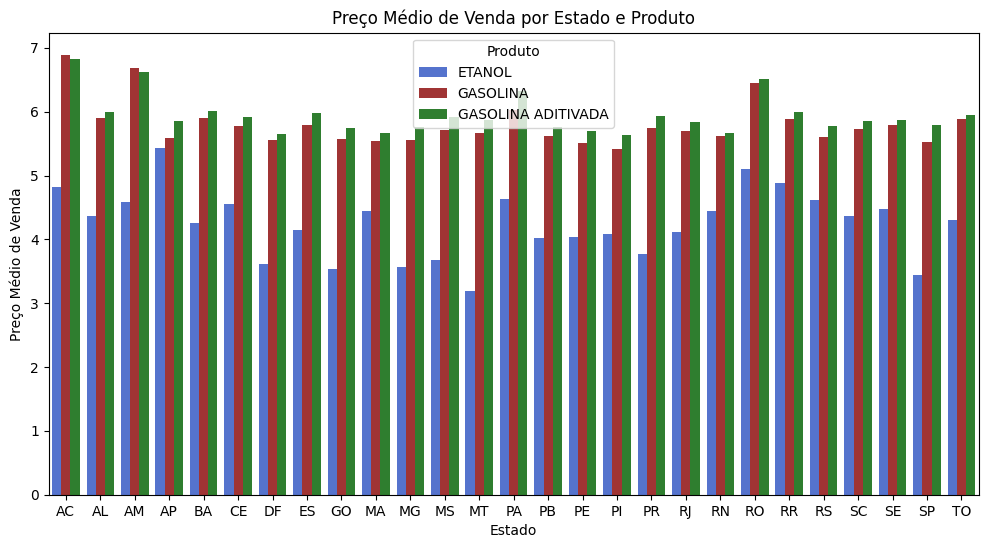

In [12]:
# Agrupa por Estado e Produto e calcula a média
preco_medio = df.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean()

# Converte o resultado de volta para DataFrame para facilitar a manipulação
preco_medio_df = preco_medio.reset_index()

# Visualiza o DataFrame resultante
print("DataFrame com Preço Médio por Estado e Produto:")
print(preco_medio_df.describe())

%matplotlib inline

# Criar um gráfico de barras usando seaborn com cores específicas
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado - Sigla', y='Valor de Venda', hue='Produto', data=preco_medio_df,
            palette={'GASOLINA': 'firebrick', 'ETANOL': 'royalblue', 'GASOLINA ADITIVADA': 'forestgreen'})
plt.title('Preço Médio de Venda por Estado e Produto')
plt.xlabel('Estado')
plt.ylabel('Preço Médio de Venda')
plt.show()

#O código abaixo agrupa os dados pelo estado e produto, calcula a média dos valores de venda para cada grupo e, em seguida, organiza as informações em um DataFrame para facilitar a visualização.

In [13]:
# Criando um DataFrame com os valores médios
media_por_estado = df.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().unstack()

# Selecionando apenas as colunas relevantes
media_por_estado = media_por_estado[['ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA']]

# Renomeando as colunas
media_por_estado.columns = ['Valor Médio Etanol', 'Valor Médio Gasolina', 'Valor Médio Gasolina Aditivada']

# Exibindo o resultado
print(media_por_estado)

                Valor Médio Etanol  Valor Médio Gasolina  \
Estado - Sigla                                             
AC                        4.814746              6.892689   
AL                        4.368662              5.902182   
AM                        4.586296              6.684812   
AP                        5.432000              5.582523   
BA                        4.256841              5.908484   
CE                        4.555342              5.770411   
DF                        3.614411              5.560417   
ES                        4.154485              5.789597   
GO                        3.540582              5.565066   
MA                        4.444377              5.535344   
MG                        3.572839              5.553522   
MS                        3.673664              5.711078   
MT                        3.196731              5.666366   
PA                        4.628586              6.031001   
PB                        4.029035      

#Este código gera dois boxplots. O primeiro mostra a distribuição dos preços de venda por produto, enquanto o segundo mostra a distribuição por estado

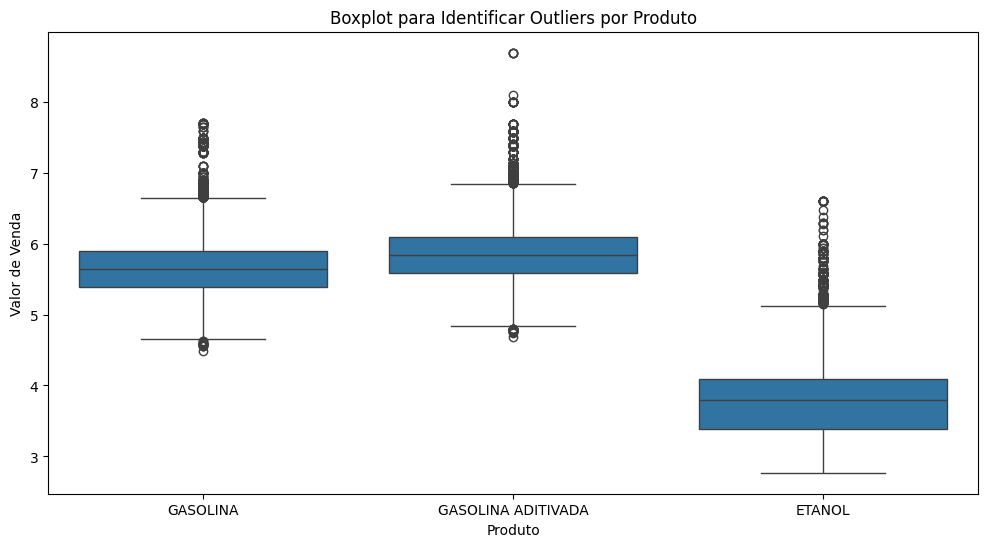

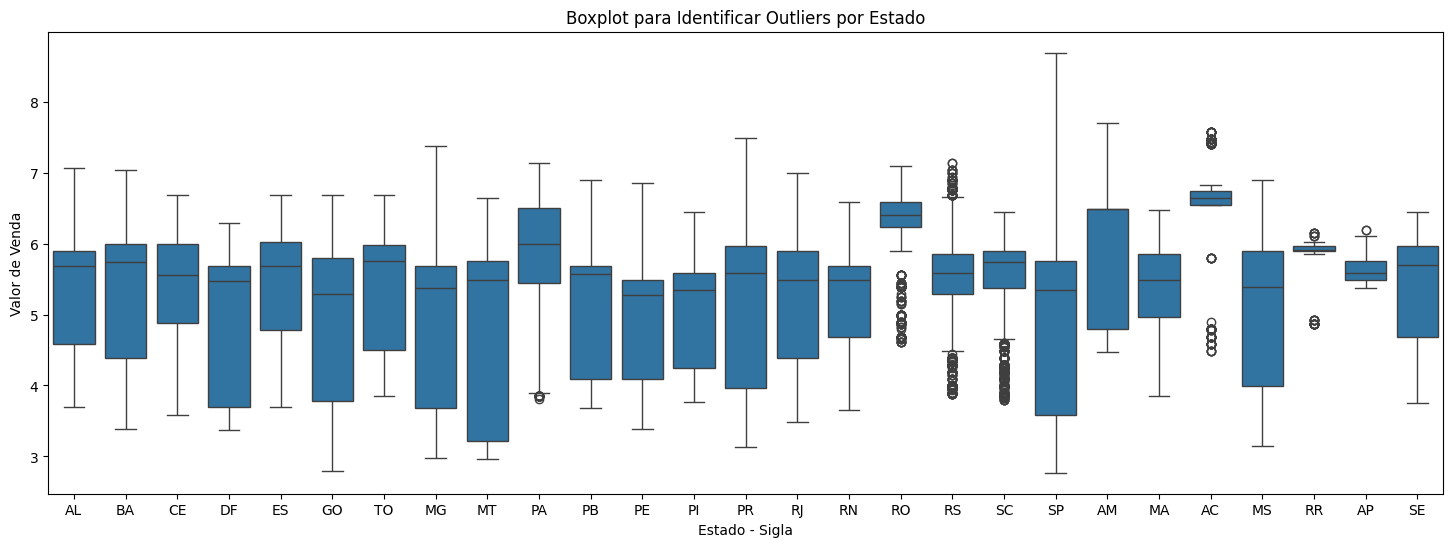

In [15]:
# Revisão dos Dados
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')  # Converta para tipo numérico

# Resetando o índice
df.reset_index(drop=True, inplace=True)

# Boxplot para visualizar outliers por Produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='Produto', y='Valor de Venda', data=df)
plt.title('Boxplot para Identificar Outliers por Produto')
plt.show()

# Boxplot para visualizar outliers por Estado
plt.figure(figsize=(18, 6))
sns.boxplot(x='Estado - Sigla', y='Valor de Venda', data=df)
plt.title('Boxplot para Identificar Outliers por Estado')
plt.show()

#<font color='#0000CD'>5. Qual o município que possui o menor preço para a gasolina e para o etanol?

Menor preço para a gasolina: SAO CARLOS - Valor: 4.49
Menor preço para a gasolina aditivada: ASSIS - Valor: 4.69
Menor preço para o etanol: GUARULHOS - Valor: 2.77


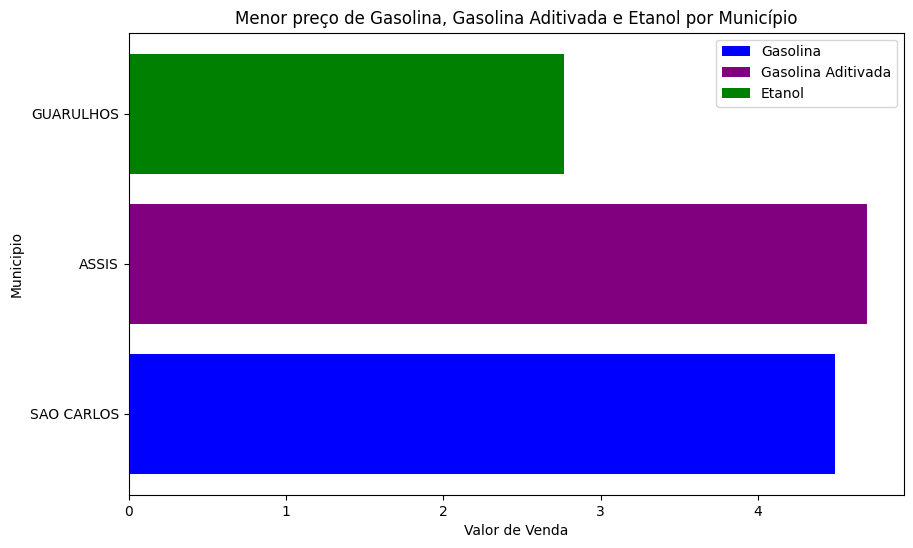

In [16]:
# Converter a coluna 'Valor de Venda' para tipo numérico (float)
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')

# Criar DataFrames para os menores preços
menor_preco_gasolina_df = df.loc[df['Produto'] == 'GASOLINA', ['Municipio', 'Valor de Venda']].nsmallest(1, 'Valor de Venda')
menor_preco_etanol_df = df.loc[df['Produto'] == 'ETANOL', ['Municipio', 'Valor de Venda']].nsmallest(1, 'Valor de Venda')
menor_preco_gasolina_aditivada_df = df.loc[df['Produto'] == 'GASOLINA ADITIVADA', ['Municipio', 'Valor de Venda']].nsmallest(1, 'Valor de Venda')

# Exibir os resultados da pesquisa
print("Menor preço para a gasolina:", menor_preco_gasolina_df['Municipio'].values[0], "- Valor:", menor_preco_gasolina_df['Valor de Venda'].values[0])
print("Menor preço para a gasolina aditivada:", menor_preco_gasolina_aditivada_df['Municipio'].values[0], "- Valor:", menor_preco_gasolina_aditivada_df['Valor de Venda'].values[0])
print("Menor preço para o etanol:", menor_preco_etanol_df['Municipio'].values[0], "- Valor:", menor_preco_etanol_df['Valor de Venda'].values[0])

# Criar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

# Adicionar barras empilhadas
plt.barh(menor_preco_gasolina_df['Municipio'], menor_preco_gasolina_df['Valor de Venda'], color='blue', label='Gasolina')
plt.barh(menor_preco_gasolina_aditivada_df['Municipio'], menor_preco_gasolina_aditivada_df['Valor de Venda'], color='purple', label='Gasolina Aditivada')
plt.barh(menor_preco_etanol_df['Municipio'], menor_preco_etanol_df['Valor de Venda'], color='green', label='Etanol')

# Adicionar legendas na parte superior e do lado direito
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.xlabel('Valor de Venda')
plt.ylabel('Municipio')
plt.title('Menor preço de Gasolina, Gasolina Aditivada e Etanol por Município')

# Exibir o gráfico
plt.show()

#<font color='#0000CD'>6. Qual o município que possui o maior preço para a gasolina e para o etanol?

In [17]:
# Encontrar o município com o maior preço para a gasolina
maior_preco_gasolina = df[df['Produto'] == 'GASOLINA']['Valor de Venda'].nlargest(1)
maior_municipio_gasolina = df.loc[maior_preco_gasolina.index, 'Municipio'].values[0]
valor_gasolina = maior_preco_gasolina.values[0]

# Encontrar o município com o maior preço para o etanol
maior_preco_etanol = df[df['Produto'] == 'ETANOL']['Valor de Venda'].nlargest(1)
maior_municipio_etanol = df.loc[maior_preco_etanol.index, 'Municipio'].values[0]
valor_etanol = maior_preco_etanol.values[0]

# Encontrar o município com o maior preço para a gasolina aditivada
maior_preco_gasolina_aditivada = df[df['Produto'] == 'GASOLINA ADITIVADA']['Valor de Venda'].nlargest(1)
maior_municipio_gasolina_aditivada = df.loc[maior_preco_gasolina_aditivada.index, 'Municipio'].values[0]
valor_gasolina_aditivada = maior_preco_gasolina_aditivada.values[0]

# Apresentar os resultados
print(f"Maior preço para a gasolina: {maior_municipio_gasolina} - Valor: {valor_gasolina}")
print(f"Maior preço para o etanol: {maior_municipio_etanol} - Valor: {valor_etanol}")
print(f"Maior preço para a gasolina aditivada: {maior_municipio_gasolina_aditivada} - Valor: {valor_gasolina_aditivada}")

Maior preço para a gasolina: TEFE - Valor: 7.7
Maior preço para o etanol: SANTAREM - Valor: 6.6
Maior preço para a gasolina aditivada: SAO PAULO - Valor: 8.69


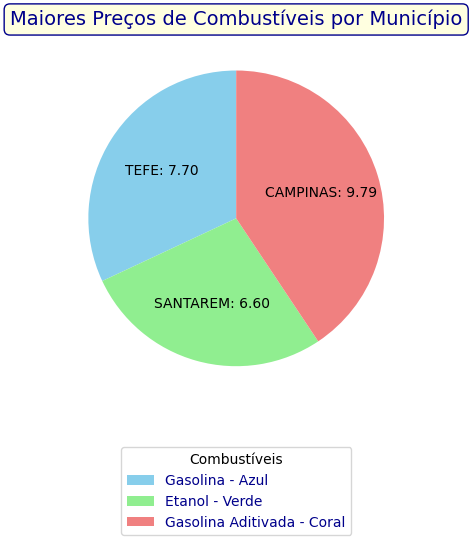

In [18]:
# Dados para o gráfico de pizza
valores = [7.7, 6.6, 9.79]
municipios = ['TEFE', 'SANTAREM', 'CAMPINAS']

# Cores correspondentes
cores = ['skyblue', 'lightgreen', 'lightcoral']

# Criar o gráfico de pizza
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(valores, labels=None, startangle=90, colors=cores, autopct='%1.2f%%')

# Adicionar rótulos customizados com os combustíveis e cores correspondentes
labels = ['Gasolina - Azul', 'Etanol - Verde', 'Gasolina Aditivada - Coral']
ax.legend(patches, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), title='Combustíveis', labelcolor='darkblue')

# Substituir porcentagens pelos valores dos combustíveis e nomes dos municípios
for text, valor, municipio in zip(autotexts, valores, municipios):
    text.set_text(f'{municipio}: {valor:.2f}')

# Adicionar título com cor diferente
title = ax.set_title('Maiores Preços de Combustíveis por Município', fontsize=14, color='darkblue')
plt.setp(title, bbox=dict(facecolor='lightyellow', edgecolor='darkblue', boxstyle='round,pad=0.3'))

# Exibir o gráfico
plt.show()

# <font color = "#EE82EE"> 7. Qual a região que possui o maior valor médio da gasolina?

In [ ]:
import pandas as pd

max_gaso = df[['Valor de Venda']].groupby([df['Regiao - Sigla'],df['Produto']]).mean()

max_gaso

In [23]:
questao7 = max_gaso.query('Produto == "GASOLINA"').sort_values('Valor de Venda', ascending=False)

In [24]:
questao7.head(1)

,,Valor de Venda
Regiao - Sigla,Produto,
N,GASOLINA,6.204558


# <font color = "#EE82EE"> 8. Qual a região que possui o menor valor médio do etanol?

In [ ]:
import pandas as pd

min_eta = df[['Valor de Venda']].groupby([df['Regiao - Sigla'],df['Produto']]).mean()

min_eta

In [26]:
questao8 = min_eta.query('Produto == "ETANOL"').sort_values('Valor de Venda')

In [27]:
questao8.head(1)

,,Valor de Venda
Regiao - Sigla,Produto,
CO,ETANOL,3.509253


# <font color = "#EE82EE"> 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?


In [28]:
questao9 = df.groupby(['Regiao - Sigla','Data da Coleta', 'Produto'])['Valor de Venda'].mean()

questao9 = pd.DataFrame(questao9)

questao9 = questao9['Valor de Venda'].unstack()
questao9E = pd.DataFrame(questao9['ETANOL'].unstack())
questao9G = pd.DataFrame(questao9['GASOLINA'].unstack())

In [29]:
questao9G.T.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.249630,0.092482,-0.015832,-0.037893
N,-0.249630,1.000000,-0.049678,0.093756,0.165315
NE,0.092482,-0.049678,1.000000,-0.002293,-0.620034
S,-0.015832,0.093756,-0.002293,1.000000,0.054468
SE,-0.037893,0.165315,-0.620034,0.054468,1.000000


In [30]:
questao9E.T.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.187783,0.443333,0.044705,0.053108
N,-0.187783,1.000000,-0.234560,-0.127789,-0.360588
NE,0.443333,-0.234560,1.000000,-0.224025,-0.411364
S,0.044705,-0.127789,-0.224025,1.000000,0.486515
SE,0.053108,-0.360588,-0.411364,0.486515,1.000000


# <font color = "green"> Pergunta 12: Qual é a variação percentual dos preços da gasolina e do etanol em cada estado durante os dois meses citados?

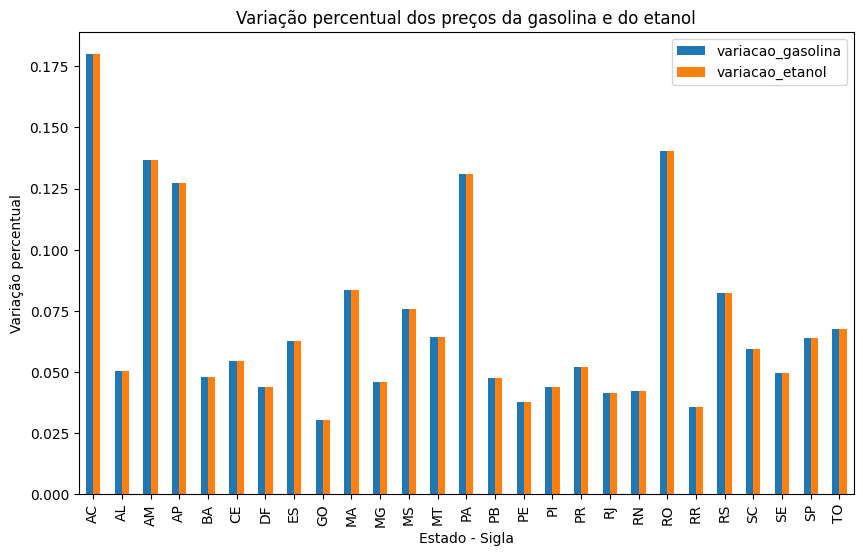

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Arquivos dos dois últimos meses de 2023
nov = pd.read_csv('/content/precos-gasolina-etanol-11.csv', sep=';')
dez = pd.read_csv('/content/precos-gasolina-etanol-12.csv', sep=';')

# Concatenando os dataframes
df = pd.concat([nov, dez])

# Verificando se 'Valor de Venda' é do tipo string
if df['Valor de Venda'].dtypes == object:
    # Substituindo vírgulas por pontos e convertendo para float
    df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

# Definindo as variáveis de preço de acordo com o valor de venda
df['preco_gasolina'] = df['Valor de Venda']
df['preco_etanol'] = df['Valor de Venda']

# Tratando valores None ou NaN e calculando a variação percentual dos preços
df['preco_gasolina'] = df['preco_gasolina'].fillna(method='ffill')
df['preco_etanol'] = df['preco_etanol'].fillna(method='ffill')
df['variacao_gasolina'] = df['preco_gasolina'].pct_change()
df['variacao_etanol'] = df['preco_etanol'].pct_change()

# Agrupando por estado e calcule a média
df_grouped = df.groupby('Estado - Sigla')[['variacao_gasolina', 'variacao_etanol']].mean()

# Criando um gráfico de barras para visualizar os resultados
ax = df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Variação percentual dos preços da gasolina e do etanol')
plt.ylabel('Variação percentual')
plt.show()









#Informações Gerais do DataFrame:
O DataFrame tem um total de 101.996 entradas (linhas). As colunas variam em termos de tipo de dados, incluindo principalmente objetos (strings) e um float64. Algumas colunas têm valores nulos, como "Numero Rua", "Complemento" e "Bairro". A coluna "Valor de Compra" parece ter todos os valores nulos. Possíveis Ações de Limpeza/Tratamento:

Valores Nulos: Pode ser necessário lidar com os valores nulos nas colunas "Numero Rua", "Complemento" e "Bairro". Dependendo do contexto, você pode preencher os valores nulos com informações apropriadas ou remover as linhas. Coluna "Valor de Compra": A coluna "Valor de Compra" parece estar completamente vazia. Se não for necessária, você pode considerar removê-la. Tipos de Dados: A coluna "Valor de Venda" está atualmente como objeto. Se ela contiver informações numéricas, pode ser útil convertê-la para um tipo de dados numérico, como float. Data da Coleta: Se a coluna "Data da Coleta" estiver como objeto, você pode convertê-la para o tipo de dados de data para facilitar análises temporais.

In [ ]:
import pandas as pd
import numpy as np


# Agora você pode usar o DataFrame 'df' nos cálculos e análises mencionados no código anterior.

# Supondo que você tenha um DataFrame chamado 'df' com os dados dos combustíveis

# 1. Tendência de queda ou aumento nos preços dos combustíveis
tendencia_gasolina = df['Preco_Gasolina'].diff().mean()
tendencia_etanol = df['Preco_Etanol'].diff().mean()

# 2. Preço médio da gasolina e do etanol
preco_medio_gasolina = df['Preco_Gasolina'].mean()
preco_medio_etanol = df['Preco_Etanol'].mean()

# 3. Os 5 estados com os preços médios mais altos
estados_mais_caros_gasolina = df.groupby('Estado')['Preco_Gasolina'].mean().nlargest(5)
estados_mais_caros_etanol = df.groupby('Estado')['Preco_Etanol'].mean().nlargest(5)

# 4. Preço médio por estado
preco_medio_por_estado = df.groupby('Estado')[['Preco_Gasolina', 'Preco_Etanol']].mean()

# 5 e 6. Municípios com menor e maior preço
municipio_menor_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmin()]['Municipio']
municipio_menor_preco_etanol = df.loc[df['Preco_Etanol'].idxmin()]['Municipio']
municipio_maior_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmax()]['Municipio']
municipio_maior_preco_etanol = df.loc[df['Preco_Etanol'].idxmax()]['Municipio']

# 7 e 8. Região com maior e menor valor médio
regiao_maior_valor_gasolina = df.groupby('Regiao')['Preco_Gasolina'].mean().idxmax()
regiao_menor_valor_etanol = df.groupby('Regiao')['Preco_Etanol'].mean().idxmin()

# 9. Correlação entre preço e região
correlacao_regiao_gasolina = df['Preco_Gasolina'].corr(df['Regiao'])
correlacao_regiao_etanol = df['Preco_Etanol'].corr(df['Regiao'])

# 10. Correlação entre preço e bandeira
correlacao_bandeira_gasolina = df['Preco_Gasolina'].corr(df['Bandeira'])
correlacao_bandeira_etanol = df['Preco_Etanol'].corr(df['Bandeira'])

# Suas três perguntas adicionais aqui

print(f"1. Tendência de queda ou aumento nos preços da gasolina: {tendencia_gasolina}")
print(f"   Tendência de queda ou aumento nos preços do etanol: {tendencia_etanol}")
print(f"2. Preço médio da gasolina: {preco_medio_gasolina}")
print(f"   Preço médio do etanol: {preco_medio_etanol}")
print(f"3. Estados com os preços médios mais altos (gasolina): {estados_mais_caros_gasolina}")
print(f"   Estados com os preços médios mais altos (etanol): {estados_mais_caros_etanol}")
print(f"4. Preço médio por estado:\n{preco_medio_por_estado}")
print(f"5. Município com menor preço para gasolina: {municipio_menor_preco_gasolina}")
print(f"   Município com menor preço para etanol: {municipio_menor_preco_etanol}")
print(f"6. Município com maior preço para gasolina: {municipio_maior_preco_gasolina}")
print(f"   Município com maior preço para etanol: {municipio_maior_preco_etanol}")
print(f"7. Região com maior valor médio da gasolina: {regiao_maior_valor_gasolina}")
print(f"8. Região com menor valor médio do etanol: {regiao_menor_valor_etanol}")
print(f"9. Correlação entre preço e região (gasolina): {correlacao_regiao_gasolina}")
print(f"   Correlação entre preço e região (etanol): {correlacao_regiao_etanol}")
print(f"10. Correlação entre preço e bandeira (gasolina): {correlacao_bandeira_gasolina}")
print(f"    Correlação entre preço e bandeira (etanol): {correlacao_bandeira_etanol}")


In [ ]:
import pandas as pd
import numpy as np


# 1. Tendência de queda ou aumento nos preços dos combustíveis
tendencia_gasolina = df['Preco_Gasolina'].diff().mean()
tendencia_etanol = df['Preco_Etanol'].diff().mean()

# 2. Preço médio da gasolina e do etanol
preco_medio_gasolina = df['Preco_Gasolina'].mean()
preco_medio_etanol = df['Preco_Etanol'].mean()

# 3. Os 5 estados com os preços médios mais altos
estados_mais_caros_gasolina = df.groupby('Estado')['Preco_Gasolina'].mean().nlargest(5)
estados_mais_caros_etanol = df.groupby('Estado')['Preco_Etanol'].mean().nlargest(5)

# 4. Preço médio por estado
preco_medio_por_estado = df.groupby('Estado')[['Preco_Gasolina', 'Preco_Etanol']].mean()

# 5 e 6. Municípios com menor e maior preço
municipio_menor_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmin()]['Municipio']
municipio_menor_preco_etanol = df.loc[df['Preco_Etanol'].idxmin()]['Municipio']
municipio_maior_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmax()]['Municipio']
municipio_maior_preco_etanol = df.loc[df['Preco_Etanol'].idxmax()]['Municipio']

# 7 e 8. Região com maior e menor valor médio
regiao_maior_valor_gasolina = df.groupby('Regiao')['Preco_Gasolina'].mean().idxmax()
regiao_menor_valor_etanol = df.groupby('Regiao')['Preco_Etanol'].mean().idxmin()

print(f"1. Tendência de queda ou aumento nos preços da gasolina: {tendencia_gasolina}")
print(f"   Tendência de queda ou aumento nos preços do etanol: {tendencia_etanol}")
print(f"2. Preço médio da gasolina: {preco_medio_gasolina}")
print(f"   Preço médio do etanol: {preco_medio_etanol}")
print(f"3. Estados com os preços médios mais altos (gasolina): {estados_mais_caros_gasolina}")
print(f"   Estados com os preços médios mais altos (etanol): {estados_mais_caros_etanol}")
print(f"4. Preço médio por estado:\n{preco_medio_por_estado}")
print(f"5. Município com menor preço para gasolina: {municipio_menor_preco_gasolina}")
print(f"   Município com menor preço para etanol: {municipio_menor_preco_etanol}")
print(f"6. Município com maior preço para gasolina: {municipio_maior_preco_gasolina}")
print(f"   Município com maior preço para etanol: {municipio_maior_preco_etanol}")
print(f"7. Região com maior valor médio da gasolina: {regiao_maior_valor_gasolina}")
print(f"8. Região com menor valor médio do etanol: {regiao_menor_valor_etanol}")